In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
from scipy.stats import zscore

In [2]:
sierraleone_data = pd.read_csv('../data/sierraleone-bumbuna.csv')  

In [3]:
#Summary Statistics
summary_stats = sierraleone_data.describe()

print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         

In [4]:
# Check for missing values
missing_values = sierraleone_data.isnull().sum()
# print("Missing Values:\n", missing_values)

for column in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    sierraleone_data[column].fillna(sierraleone_data[column].median())

# Optionally, drop columns with too many missing values or rows with missing values in critical columns
# sierraleone_data.dropna(subset=['GHI', 'DNI', 'DHI',],)

In [5]:
# Check for outliers (e.g., in GHI, DNI, DHI)
outliers = sierraleone_data[(sierraleone_data['GHI'] < 0) | (sierraleone_data['DNI'] < 0) | (sierraleone_data['DHI'] < 0)]
# print("Outliers:\n", outliers)

In [6]:
# Convert Timestamp to datetime
sierraleone_data['Timestamp'] = pd.to_datetime(sierraleone_data['Timestamp'])

c:\Users\Aksumawit\Desktop\10Academy\10_Academy_Week_0\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


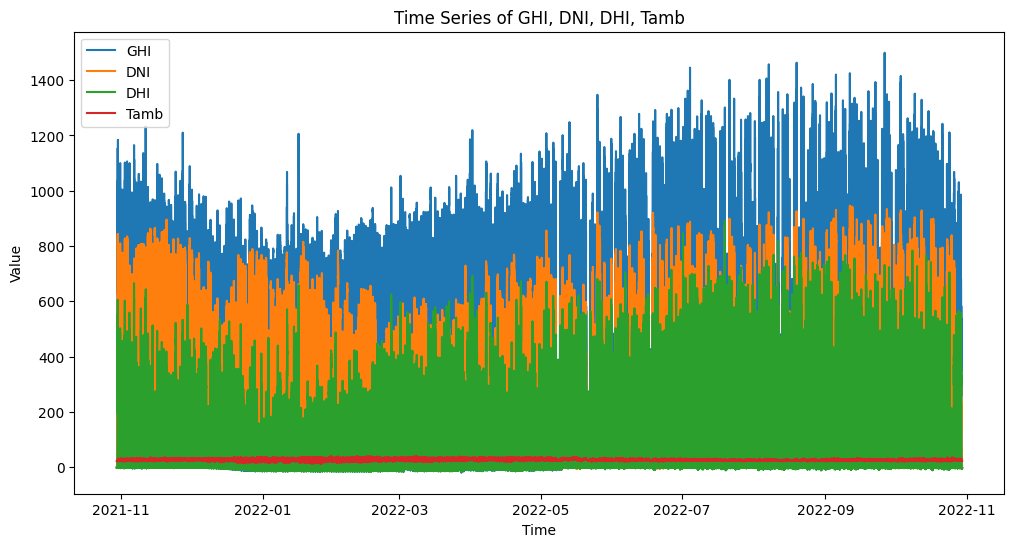

In [7]:
# Plot time series for GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 6))
plt.plot(sierraleone_data['Timestamp'], sierraleone_data['GHI'], label='GHI')
plt.plot(sierraleone_data['Timestamp'], sierraleone_data['DNI'], label='DNI')
plt.plot(sierraleone_data['Timestamp'], sierraleone_data['DHI'], label='DHI')
plt.plot(sierraleone_data['Timestamp'], sierraleone_data['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, Tamb')
plt.legend()
plt.show()

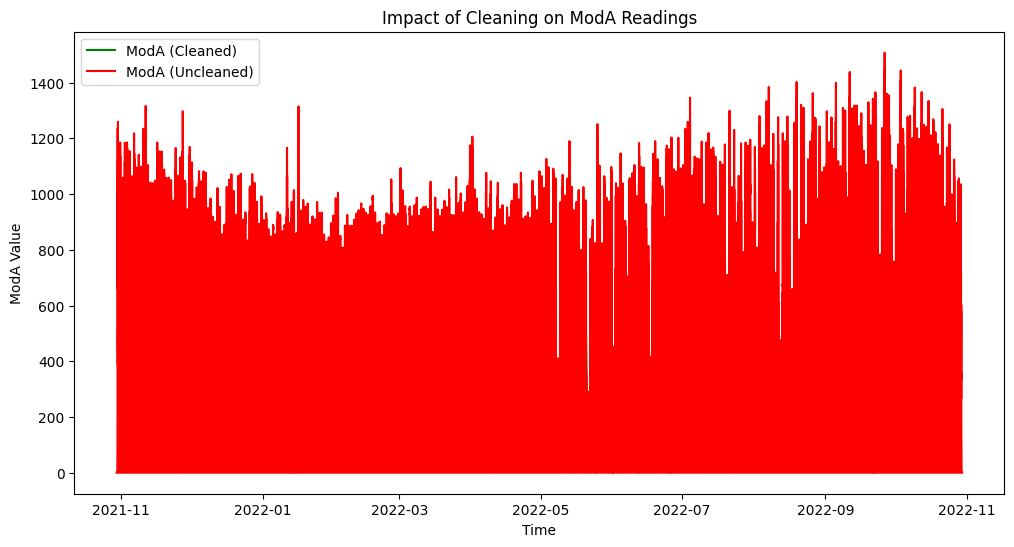

In [8]:
# Compare ModA and ModB readings before and after cleaning
cleaned_data = sierraleone_data[sierraleone_data['Cleaning'] == 1]
uncleaned_data = sierraleone_data[sierraleone_data['Cleaning'] == 0]

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA (Cleaned)', color='green')
plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red')
plt.xlabel('Time')
plt.ylabel('ModA Value')
plt.title('Impact of Cleaning on ModA Readings')
plt.legend()
plt.show()

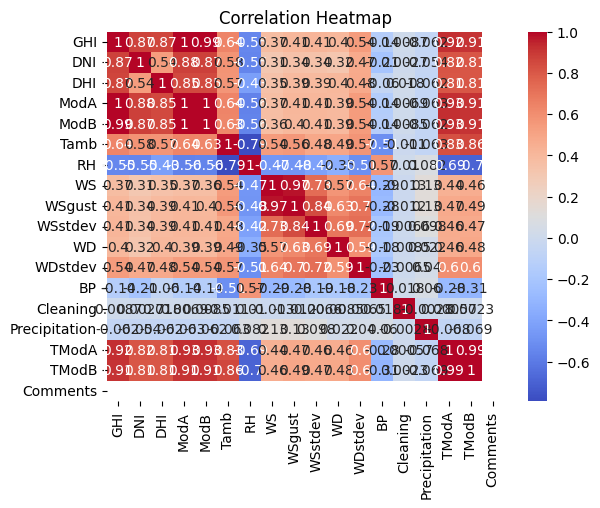

In [9]:
# Correlation heatmap
# plt.figure(figsize=(10, 8))
corr = sierraleone_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

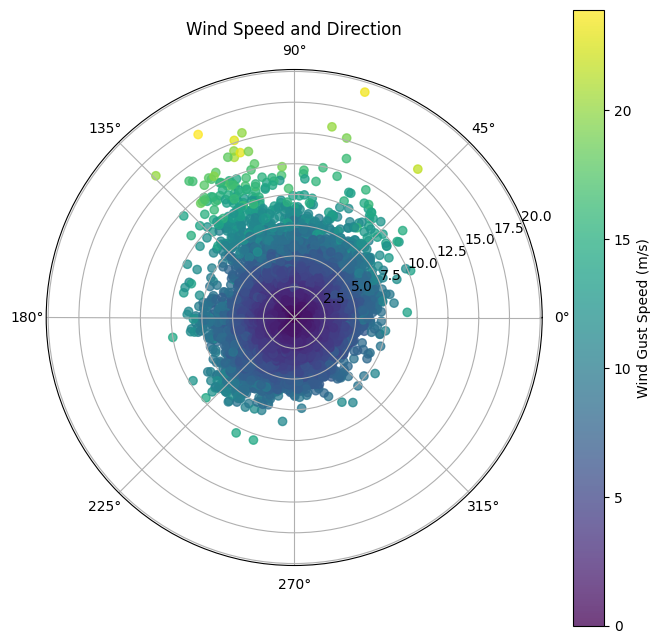

In [10]:
# Polar plot for wind speed and direction

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(sierraleone_data['WD'] * np.pi / 180, sierraleone_data['WS'], c=sierraleone_data['WSgust'], cmap=cm.viridis, alpha=0.75)
plt.colorbar(label='Wind Gust Speed (m/s)')
plt.title('Wind Speed and Direction')
plt.show()

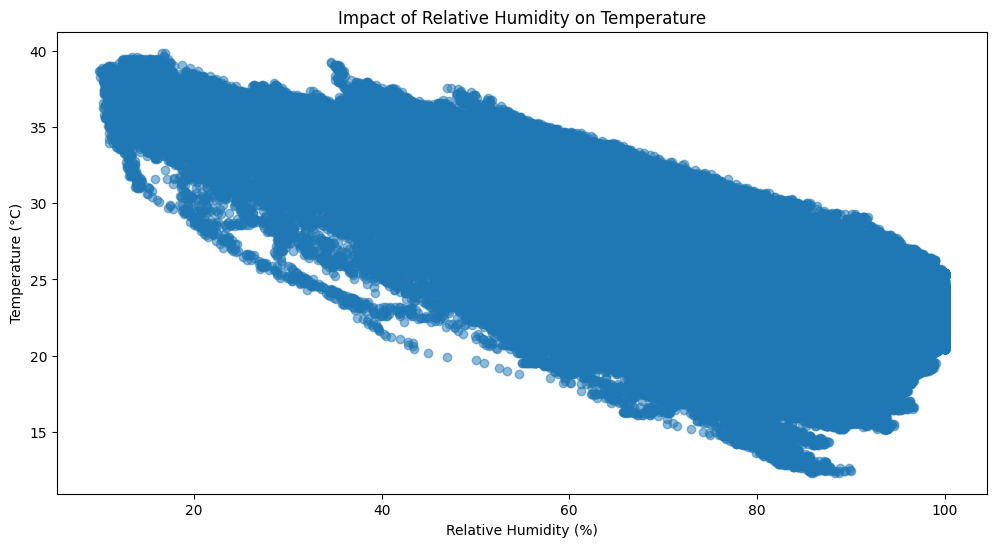

In [11]:
# Scatter plot to explore the influence of RH on temperature
plt.figure(figsize=(12, 6))
plt.scatter(sierraleone_data['RH'], sierraleone_data['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Impact of Relative Humidity on Temperature')
plt.show()

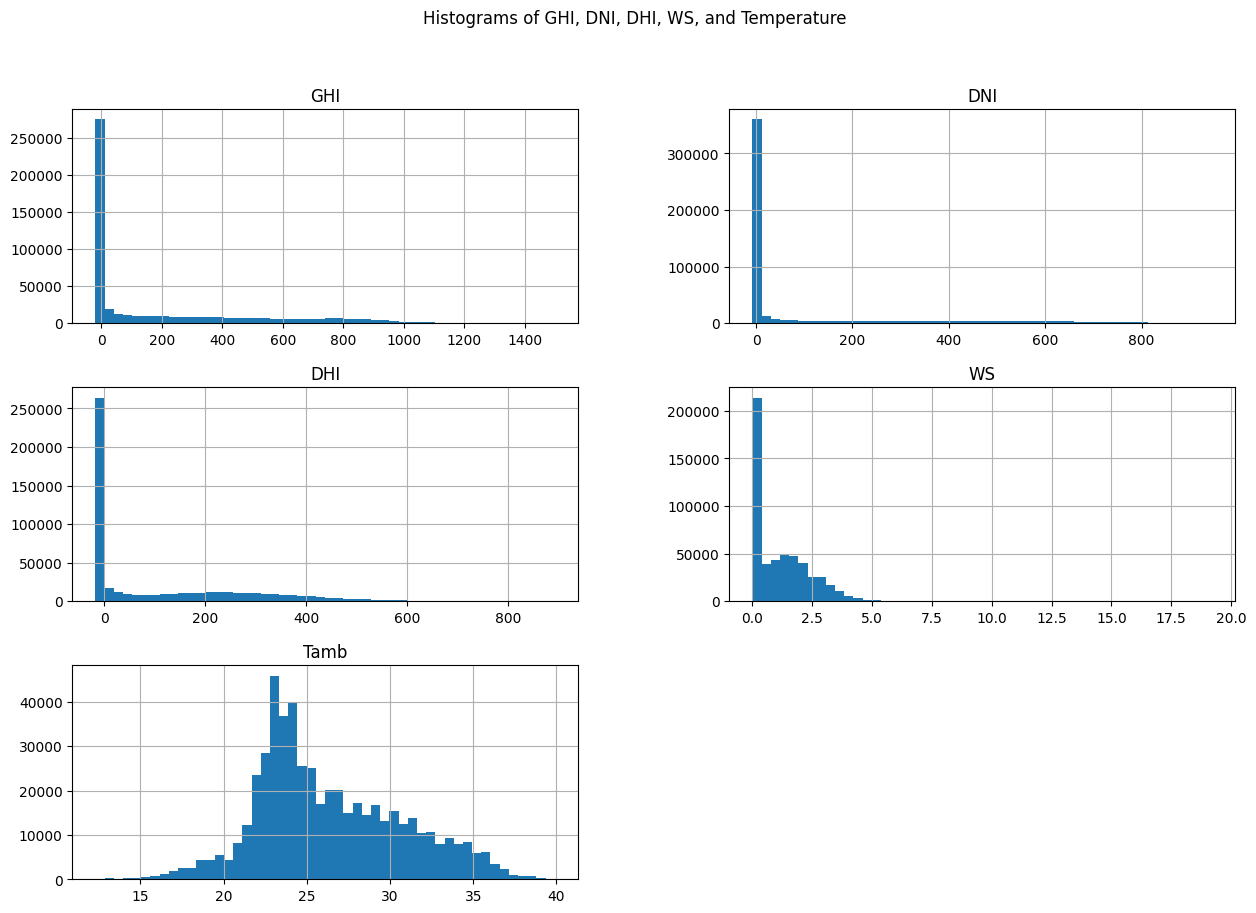

In [12]:
# Create histograms for GHI, DNI, DHI, WS, and temperatures
sierraleone_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
plt.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
plt.show()

In [13]:
# Z-Score Analysis

sierraleone_data['GHI_zscore'] = zscore(sierraleone_data['GHI'])
zscore_outliers = sierraleone_data[sierraleone_data['GHI_zscore'].abs() > 3]
# print("Z-Score Outliers:\n", zscore_outliers)

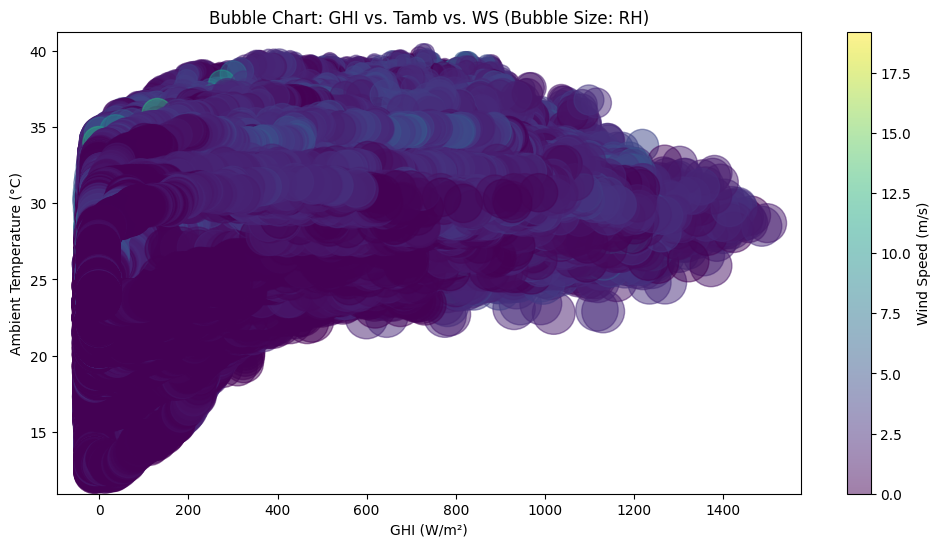

In [14]:
# Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size
plt.figure(figsize=(12, 6))
plt.scatter(sierraleone_data['GHI'], sierraleone_data['Tamb'], s=sierraleone_data['RH']*10, alpha=0.5, c=sierraleone_data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
plt.show()

In [15]:
# Handle missing values 

In [16]:
# 1) Drop rows with missing data
sierraleone_data_cleaned = sierraleone_data.dropna(axis=1, how='all')  
print("Cleaned Data:\n", sierraleone_data_cleaned.head())

Cleaned Data:
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   GHI_zscore  
0   -0.678931  
1   -0.678931  
2   -0.678931  
3   -0.678931  
4  

In [17]:
# 2) Filling with median 
sierraleone_data_cleaned = sierraleone_data_cleaned.copy()
sierraleone_data_cleaned = fill_missing_values(sierraleone_data_cleaned)
print("Cleaned Data:\n", sierraleone_data_cleaned.head())

NameError: name 'fill_missing_values' is not defined